# Supermarket Customer Capstone
### Bootcamp Data Analyst – End-to-End Project (EDA → Feature Engineering → Segmentation → Insights)
*Generated on:* 2025-09-10 12:38   
*Author:* <your name>



## 1. Latar belakang 

Dalam era persaingan bisnis ritel yang semakin ketat, memahami perilaku dan kebutuhan pelanggan menjadi kunci utama bagi perusahaan untuk dapat bertahan dan berkembang. Supermarket sebagai salah satu bentuk bisnis ritel modern menghadapi tantangan untuk menarik pelanggan baru sekaligus mempertahankan pelanggan lama.

Setiap pelanggan memiliki karakteristik yang berbeda, baik dari segi demografis (usia, pendapatan, status pernikahan, pendidikan), maupun dari segi perilaku belanja (jenis produk yang sering dibeli, besarnya pengeluaran, dan respons terhadap promosi). Tanpa adanya pemahaman yang mendalam mengenai perbedaan ini, strategi pemasaran yang dilakukan berpotensi kurang efektif dan tidak tepat sasaran.

Oleh karena itu, analisis segmentasi pelanggan sangat penting dilakukan. Dengan melakukan segmentasi, perusahaan dapat mengelompokkan pelanggan ke dalam kategori tertentu berdasarkan kesamaan karakteristik dan pola belanja. Hasil segmentasi ini akan menjadi dasar bagi perusahaan untuk merancang strategi promosi yang lebih tepat, personal, dan efektif sehingga dapat meningkatkan loyalitas pelanggan serta mendorong peningkatan penjualan.



## 2. Rumusan Masalah 

Berdasarkan latar belakang tersebut, maka pernyataan masalah dalam penelitian ini adalah:

1. Bagaimana cara mengelompokkan pelanggan supermarket berdasarkan data demografis dan perilaku belanja mereka?

2. Segmen pelanggan mana yang memberikan kontribusi terbesar terhadap penjualan supermarket?

3. Bagaimana hasil segmentasi pelanggan dapat dimanfaatkan untuk menentukan bentuk promosi yang tepat sasaran di masa mendatang?


## 3. Tujuan 

1. Melakukan segmentasi pelanggan berdasarkan data demografis dan perilaku belanja pada dataset supermarket.

2. Mengidentifikasi karakteristik utama dari masing-masing segmen pelanggan.

3. Menentukan segmen pelanggan yang paling potensial untuk dijadikan target promosi.

4. Memberikan rekomendasi strategi promosi yang sesuai dengan hasil segmentasi pelanggan.


## 4. Imports & Settings


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")



## 5. Data Understanding and Cleaning
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.


In [12]:
df = pd.read_csv('Supermarket customer.csv', delimiter='\t')
display(df.head(), df.tail())


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


In [13]:
df.info()
print(f'Jumlah data baris dan kolom adalah {df.shape}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i


#### 📑 Data Dictionary – Supermarket Customers
##### People (Data Pelanggan)

ID: Nomor unik pelanggan.

Year_Birth: Tahun kelahiran pelanggan.

Education: Tingkat pendidikan pelanggan.

Marital_Status: Status pernikahan pelanggan.

Income: Pendapatan rumah tangga tahunan pelanggan.

Kidhome: Jumlah anak kecil di rumah tangga pelanggan.

Teenhome: Jumlah remaja di rumah tangga pelanggan.

Dt_Customer: Tanggal pelanggan mulai bergabung/terdaftar di perusahaan.

Recency: Jumlah hari sejak terakhir kali pelanggan melakukan pembelian.

Complain: Nilai 1 jika pelanggan pernah mengajukan komplain dalam 2 tahun terakhir, nilai 0 jika tidak.

##### Products (Produk yang Dibeli)

MntWines: Total pengeluaran untuk produk anggur (wine) dalam 2 tahun terakhir.

MntFruits: Total pengeluaran untuk buah-buahan dalam 2 tahun terakhir.

MntMeatProducts: Total pengeluaran untuk produk daging dalam 2 tahun terakhir.

MntFishProducts: Total pengeluaran untuk produk ikan dalam 2 tahun terakhir.

MntSweetProducts: Total pengeluaran untuk produk manisan/permen dalam 2 tahun terakhir.

MntGoldProds: Total pengeluaran untuk produk emas dalam 2 tahun terakhir.

##### Promotion (Promosi)

NumDealsPurchases: Jumlah pembelian yang dilakukan dengan menggunakan diskon.

AcceptedCmp1: Nilai 1 jika pelanggan menerima tawaran pada kampanye promosi pertama, 0 jika tidak.

AcceptedCmp2: Nilai 1 jika pelanggan menerima tawaran pada kampanye promosi kedua, 0 jika tidak.

AcceptedCmp3: Nilai 1 jika pelanggan menerima tawaran pada kampanye promosi ketiga, 0 jika tidak.

AcceptedCmp4: Nilai 1 jika pelanggan menerima tawaran pada kampanye promosi keempat, 0 jika tidak.

AcceptedCmp5: Nilai 1 jika pelanggan menerima tawaran pada kampanye promosi kelima, 0 jika tidak.

Response: Nilai 1 jika pelanggan menerima tawaran pada kampanye terakhir, 0 jika tidak.

##### Place (Tempat/Channel Pembelian)

NumWebPurchases: Jumlah pembelian yang dilakukan melalui website perusahaan.

NumCatalogPurchases: Jumlah pembelian yang dilakukan menggunakan katalog.

NumStorePurchases: Jumlah pembelian yang dilakukan langsung di toko fisik.

NumWebVisitsMonth: Jumlah kunjungan ke website perusahaan dalam sebulan terakhir

In [19]:
display(df.describe(), df.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [16]:
# Menampilkan kolom data unik pada dataset 
unique_counts = []
for col in df.columns :
    unique_counts.append([col, df[col].nunique(), df[col].unique()])

unique_countsDesc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=unique_counts)
# Tampilkan hasil
unique_countsDesc

,Column Name,Number of Unique,Unique Sample
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177..."
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 198..."
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, A..."
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, ..."
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-201..."
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 8..."
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6..."


In [17]:
display(df.describe(), df.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


### **Secara umum, kita bisa melihat bahwa:**

Dataset Supermarket Customer memiliki 29 kolom dan 2.240 baris data pelanggan.

Beberapa kolom penting antara lain: Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Recency, serta pengeluaran tahunan (MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds).

Kolom ID berisi identitas unik pelanggan, sehingga tidak relevan untuk analisis langsung.

Kolom Income berisi data numerik, tetapi perlu dicek apakah ada nilai kosong (missing value) atau outlier yang ekstrem.

Kolom Year_Birth bisa digunakan untuk menghitung usia pelanggan, namun kemungkinan terdapat outlier (misalnya tahun lahir yang terlalu kecil/besar tidak realistis).

Kolom Education dan Marital_Status adalah data kategorikal yang dapat digunakan untuk analisis segmentasi.

Kolom Kidhome dan Teenhome menunjukkan jumlah anak kecil dan remaja di rumah, berguna untuk mengetahui preferensi belanja berdasarkan kondisi keluarga.

Kolom Recency menyatakan berapa hari terakhir pelanggan melakukan pembelian, penting untuk analisis loyalitas pelanggan.

Terdapat beberapa variabel kampanye (AcceptedCmp1 s/d AcceptedCmp5, serta Response) yang menunjukkan apakah pelanggan menerima penawaran promosi tertentu.

Kolom Complain menandakan apakah pelanggan pernah melakukan komplain.

Variabel geografis (Country) dapat dipakai untuk segmentasi berdasarkan lokasi.

Beberapa data kategorikal ordinal (misalnya tingkat pendidikan) bisa diubah menjadi nilai ranking agar memudahkan analisis

In [18]:
# Mencari missing value
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Terdapat missing value pada kolom income 

In [21]:
# Cek statistik deskriptif kolom numerik
print("\nStatistik deskriptif:")
display(df.describe())


Statistik deskriptif:


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [22]:
# Cek outlier pada Year_Birth
print("\nCek range Year_Birth:")
print(df['Year_Birth'].min(), "-", df['Year_Birth'].max())


Cek range Year_Birth:
1893 - 1996


📌 Ringkasan Dataset Supermarket Customer

Terdapat missing value pada kolom: Income.

Kolom Year_Birth memiliki range dari 1893 sampai 1996.

Kolom Education memiliki kategori: Graduation, PhD, Master, 2n Cycle, Basic (dan lainnya).

Kolom Marital_Status memiliki kategori: Single, Married, Divorced, Together, Widow (dan lainnya).

Kolom Recency bernilai antara 0 hingga 99 hari.

Kolom pengeluaran pelanggan mencakup: MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds.

Kolom kampanye yang tersedia: AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, Response.

Kolom Complain menunjukkan apakah pelanggan pernah melakukan komplain (0 = tidak, 1 = ya)

## Deteksi Data Aneh/Outlier

In [31]:
# cek umur
df["Age"] = 2025 - df["Year_Birth"]
print("Umur min:", df["Age"].min())
print("Umur max:", df["Age"].max())

Umur min: 29
Umur max: 132


In [25]:
# ---------------------------
# 1. Cek umur pelanggan (Year_Birth)
# ---------------------------
if "Year_Birth" in df.columns:
    df["Age"] = 2025 - df["Year_Birth"]  # asumsi tahun sekarang 2025
    outlier_age = df[(df["Age"] < 18) | (df["Age"] > 100)]
    print("🧓 Outlier Umur (Age < 18 atau > 100):")
    print(outlier_age[["ID", "Year_Birth", "Age"]].head())
    print(f"Jumlah outlier umur: {len(outlier_age)}\n")

🧓 Outlier Umur (Age < 18 atau > 100):
        ID  Year_Birth  Age
192   7829        1900  125
239  11004        1893  132
339   1150        1899  126
Jumlah outlier umur: 3



Ada 3 pelanggan dengan umur > 100 tahun → kemungkinan data entry error

In [26]:
# ---------------------------
# 2. Cek kategori aneh pada kolom kategorikal
# ---------------------------
categorical_cols = df.select_dtypes(include="object").columns
for col in categorical_cols:
    unique_vals = df[col].unique()
    print(f"Kolom {col} memiliki {len(unique_vals)} kategori: {unique_vals}")

Kolom Education memiliki 5 kategori: ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Kolom Marital_Status memiliki 8 kategori: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
Kolom Dt_Customer memiliki 663 kategori: ['04-09-2012' '08-03-2014' '21-08-2013' '10-02-2014' '19-01-2014'
 '09-09-2013' '13-11-2012' '08-05-2013' '06-06-2013' '13-03-2014'
 '15-11-2013' '10-10-2012' '24-11-2012' '24-12-2012' '31-08-2012'
 '28-03-2013' '03-11-2012' '08-08-2012' '06-01-2013' '23-12-2012'
 '11-01-2014' '18-03-2013' '02-01-2013' '27-05-2013' '20-02-2013'
 '31-05-2013' '22-11-2013' '22-05-2014' '11-05-2013' '29-10-2012'
 '29-08-2013' '31-12-2013' '02-09-2013' '11-02-2014' '01-02-2013'
 '29-04-2013' '12-03-2013' '05-11-2013' '02-10-2013' '28-06-2014'
 '09-11-2012' '24-05-2013' '01-01-2014' '08-11-2012' '12-05-2014'
 '11-08-2012' '07-06-2014' '12-06-2013' '19-11-2012' '02-04-2013'
 '28-04-2014' '17-06-2013' '03-03-2014' '04-07-2013' '07-09-2012'
 '18-02-2013' '11-06-2013' '06

- Terdapat kategori "2n Cycle" pada kolom Education 


- Terdapat kategori "YOLO, Absurd, Alone, Together" pada kolom Marital_Status

In [32]:
# cek income
print("Income min:", df["Income"].min())
print("Income max:", df["Income"].max())

Income min: 1730.0
Income max: 666666.0


In [27]:
# ---------------------------
# 3. Cek Income yang tidak logis (misalnya negatif atau terlalu tinggi)
# ---------------------------
if "Income" in df.columns:
    outlier_income = df[(df["Income"] < 0) | (df["Income"] > 200000)]
    print("\n💰 Outlier Income (negatif atau > 200,000):")
    print(outlier_income[["ID", "Income"]].head())
    print(f"Jumlah outlier income: {len(outlier_income)}\n")


💰 Outlier Income (negatif atau > 200,000):
        ID    Income
2233  9432  666666.0
Jumlah outlier income: 1



Ada 1 pelanggan dengan income >200,000

In [28]:
# ---------------------------
# 4. Cek nilai Recency (harusnya 0-99 hari, kalau lebih aneh)
# ---------------------------
if "Recency" in df.columns:
    outlier_recency = df[df["Recency"] > 100]
    print("⏳ Outlier Recency (> 100):")
    print(outlier_recency[["ID", "Recency"]].head())
    print(f"Jumlah outlier recency: {len(outlier_recency)}\n")


⏳ Outlier Recency (> 100):
Empty DataFrame
Columns: [ID, Recency]
Index: []
Jumlah outlier recency: 0



In [33]:
# cek total anak
df["TotalChildren"] = df["Kidhome"] + df["Teenhome"]
print("Total anak min:", df["TotalChildren"].min())
print("Total anak max:", df["TotalChildren"].max())

Total anak min: 0
Total anak max: 3


In [29]:
# ---------------------------
# 5. Cek jumlah anak (Kidhome + Teenhome)
# ---------------------------
if "Kidhome" in df.columns and "Teenhome" in df.columns:
    df["TotalChildren"] = df["Kidhome"] + df["Teenhome"]
    outlier_children = df[df["TotalChildren"] > 10]  # misalnya punya lebih dari 10 anak dianggap outlier
    print("👶 Outlier jumlah anak (>10):")
    print(outlier_children[["ID", "Kidhome", "Teenhome", "TotalChildren"]].head())
    print(f"Jumlah outlier anak: {len(outlier_children)}\n")

👶 Outlier jumlah anak (>10):
Empty DataFrame
Columns: [ID, Kidhome, Teenhome, TotalChildren]
Index: []
Jumlah outlier anak: 0




# Data Cleaning 


### Load Data

Pada tahap awal, dataset Supermarket Customers dibaca menggunakan fungsi load_supermarket(). Fungsi ini dibuat untuk mendeteksi delimiter secara otomatis, baik koma maupun tab. Hasilnya, dataset berhasil dibaca dengan ukuran (jumlah_baris, jumlah_kolom). Sepuluh kolom teratas yang ditampilkan menunjukkan bahwa struktur data sudah sesuai dan setiap variabel terbaca dengan benar.

In [73]:

# =========================================================
# 0) Load data (otomatis deteksi delimiter koma atau tab)
# =========================================================
def load_supermarket(path="Supermarket customer.csv"):
    try:
        df = pd.read_csv(path)                 
        if df.shape[1] == 1:                   
            df = pd.read_csv(path, sep="\t")
    except Exception:
        df = pd.read_csv(path, sep=None, engine="python")  
    return df

df = load_supermarket()
print("Bentuk data awal:", df.shape)
df.head()


Bentuk data awal: (2240, 29)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


### **Rapikan Nama Kolom (trim spasi)**
Langkah ini bertujuan untuk menghapus spasi berlebih pada nama kolom. Setelah dilakukan trimming, nama kolom menjadi lebih rapi dan konsisten. Hal ini mencegah error pada saat pemanggilan kolom di tahap analisis berikutnya.


Kolom dengan spasi di depan/belakang sudah bersih, tidak ada lagi anomali.

In [ ]:
# =========================================================
# 1) Trim whitespace, standarisasi nama kolom
# =========================================================
df.columns = df.columns.str.strip()
df.columns.tolist()[:10]   


['ID',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines']

### **Ubah tipe data**

Beberapa kolom diubah tipenya agar sesuai dengan konten datanya. Kolom Dt_Customer dikonversi menjadi tipe datetime sehingga dapat digunakan untuk menghitung lama pelanggan terdaftar. Sementara itu, kolom kampanye promosi seperti AcceptedCmp1–5, Response, dan Complain diubah menjadi tipe integer 0/1. Perubahan ini memastikan bahwa kolom-kolom tersebut dapat diproses sebagai variabel biner.



In [74]:
# Dt_Customer -> datetime
if "Dt_Customer" in df.columns:
    df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], errors="coerce", dayfirst=True)

# Kolom kampanye / biner -> int (0/1)
binary_cols = [c for c in df.columns if c.startswith("AcceptedCmp")] + ["Response", "Complain"]
for c in binary_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce").fillna(0).astype(int)

df.dtypes.loc[["Dt_Customer"] + [c for c in binary_cols if c in df.columns]]
df[binary_cols].head(3)



,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0


- Kolom Dt_Customer berhasil dikonversi ke datetime. 

- Kolom biner (AcceptedCmp1–5, Response, Complain) sudah berisi angka 0/1.

### **Bersihkan kategori (standarisasi / gabungkan kategori aneh)**

Pada tahap ini dilakukan standarisasi data kategorikal. Kolom Marital_Status yang sebelumnya memiliki nilai aneh seperti YOLO, Absurd, atau Alone digabungkan ke dalam kategori Single. Sementara kategori Together dipetakan menjadi Married. Kolom Education juga distandarisasi dengan mengubah Phd menjadi PhD dan 2N Cycle menjadi 2n Cycle. Setelah proses ini, data kategorikal menjadi lebih konsisten dan siap untuk analisis segmentasi.



In [50]:
if "Marital_Status" in df.columns:
    df["Marital_Status"] = (
        df["Marital_Status"]
        .astype(str).str.strip().str.title()
        .replace({
            "Alone": "Single",
            "Yolo": "Single",
            "Absurd": "Single",
            "Together": "Married"  # boleh disesuaikan: Together -> Married
        })
    )

if "Education" in df.columns:
    df["Education"] = (
        df["Education"]
        .astype(str).str.strip().str.title()
        .replace({
            "2N Cycle": "2n Cycle",
            "Phd": "PhD"
        })
    )

if "Marital_Status" in df.columns:
    print(df["Marital_Status"].value_counts(dropna=False))

if "Education" in df.columns:
    print(df["Education"].value_counts(dropna=False))


Marital_Status
Married     1443
Single       486
Divorced     231
Widow         77
Name: count, dtype: int64
Education
Graduation    1127
PhD            485
Master         370
2n Cycle       201
Basic           54
Name: count, dtype: int64


- Kategori Marital_Status seperti YOLO, Absurd, Alone digabung jadi Single; Together jadi Married.

- Kategori Education distandarisasi (misalnya Phd → PhD).

### **Tangani missing values**


Tahap berikutnya adalah penanganan data kosong. Pada kolom Income, nilai kosong diisi dengan nilai median agar distribusi pendapatan tetap representatif. Pada kolom Dt_Customer, jika terdapat nilai kosong, data diisi dengan tanggal pendaftaran paling awal. Dengan cara ini, tidak ada baris yang hilang hanya karena adanya data kosong, dan dataset tetap konsisten.

In [51]:
# Income -> isi dengan median (hanya kalau ada NaN)
if "Income" in df.columns and df["Income"].isna().sum() > 0:
    df["Income"] = df["Income"].fillna(df["Income"].median())

# Dt_Customer: jika NaN, isi dengan tanggal paling awal dataset (opsional)
if "Dt_Customer" in df.columns and df["Dt_Customer"].isna().sum() > 0:
    df["Dt_Customer"] = df["Dt_Customer"].fillna(df["Dt_Customer"].min())

df[["Income","Dt_Customer"]].isna().sum()


Income         0
Dt_Customer    0
dtype: int64

- Kolom Income yang kosong diisi dengan median. 

- Jika ada Dt_Customer kosong, diisi dengan tanggal paling awal.

### **Buat fitur turunan**

Fitur tambahan dibuat untuk memperkaya analisis. Variabel Age dihitung dari tahun lahir pelanggan. Kemudian dibuat variabel TotalChildren (jumlah anak kecil dan remaja di rumah) dan variabel biner HasChild yang menandai apakah pelanggan memiliki anak atau tidak. Selanjutnya, dihitung TotalSpending dari seluruh kategori belanja produk, serta TotalPurchases dari semua saluran pembelian (web, katalog, toko). Dengan adanya fitur-fitur baru ini, segmentasi pelanggan dapat dilakukan lebih tajam.



In [52]:
# Age
if "Year_Birth" in df.columns:
    df["Age"] = 2025 - pd.to_numeric(df["Year_Birth"], errors="coerce")  # asumsi sekarang 2025

# anak
if set(["Kidhome", "Teenhome"]).issubset(df.columns):
    df["TotalChildren"] = df["Kidhome"].fillna(0) + df["Teenhome"].fillna(0)
    df["HasChild"] = (df["TotalChildren"] > 0).astype(int)

# total belanja 2 tahun terakhir
mnt_cols = [c for c in df.columns if c.startswith("Mnt")]
if mnt_cols:
    for c in mnt_cols:
        df[c] = pd.to_numeric(df[c], errors="coerce").fillna(0)
    df["TotalSpending"] = df[mnt_cols].sum(axis=1)

# total transaksi per kanal
purchase_cols = []
if "NumWebPurchases" in df.columns: purchase_cols.append("NumWebPurchases")
if "NumCatalogPurchases" in df.columns: purchase_cols.append("NumCatalogPurchases")
if "NumStorePurchases" in df.columns: purchase_cols.append("NumStorePurchases")
if purchase_cols:
    for c in purchase_cols:
        df[c] = pd.to_numeric(df[c], errors="coerce").fillna(0).astype(int)
    df["TotalPurchases"] = df[purchase_cols].sum(axis=1)

# kunjungan web / bulan
if "NumWebVisitsMonth" in df.columns:
    df["NumWebVisitsMonth"] = pd.to_numeric(df["NumWebVisitsMonth"], errors="coerce").fillna(0).astype(int)


df[["Age","TotalChildren","HasChild","TotalSpending","TotalPurchases"]].head()
df[["Age","TotalSpending","TotalPurchases"]].describe()

,Age,TotalSpending,TotalPurchases
count,2237.000000,2237.000000,2237.000000
mean,56.098346,605.743406,12.544032
std,11.701917,601.840466,7.205919
min,29.000000,5.000000,0.000000
25%,48.000000,69.000000,6.000000
50%,55.000000,396.000000,12.000000
75%,66.000000,1045.000000,18.000000
max,85.000000,2525.000000,32.000000


- Age dihitung dari Year_Birth.

- TotalChildren dan HasChild dibuat dari Kidhome + Teenhome.

- TotalSpending = jumlah seluruh Mnt*.

- TotalPurchases = total pembelian (NumWebPurchases, NumCatalogPurchases, NumStorePurchases).

- Pastikan semua numerik & tidak NaN.

### **Deteksi & treatment outlier**


Outlier pada beberapa kolom dideteksi dan ditangani. Pada kolom Age, nilai kurang dari 18 tahun atau lebih dari 100 tahun dianggap tidak realistis dan diubah menjadi NaN. Kolom Income di-clip pada persentil 1–99 untuk mengurangi pengaruh nilai ekstrem. Kolom Recency dipaksa berada pada rentang 0–100 hari. Sementara itu, TotalChildren yang lebih dari 10 dianggap tidak masuk akal dan diubah menjadi NaN. Terakhir, TotalSpending dibatasi maksimal pada persentil 99. Langkah ini dilakukan untuk menjaga kualitas data agar lebih representatif.


In [53]:
# a) Umur < 18 atau > 100 -> NaN (nanti bisa di-drop)
if "Age" in df.columns:
    age_mask = (df["Age"] < 18) | (df["Age"] > 100)
    out_age = age_mask.sum()
    if out_age > 0:
        print(f">> Mark {out_age} baris sebagai outlier umur (Age<18 atau >100).")
        df.loc[age_mask, "Age"] = np.nan

# b) Income negatif / terlalu tinggi -> cap (winsorize ringan)
if "Income" in df.columns:
    q1, q99 = df["Income"].quantile([0.01, 0.99])
    df["Income"] = df["Income"].clip(lower=max(0, q1), upper=q99)

# c) Recency di luar 0–100 -> clip
if "Recency" in df.columns:
    df["Recency"] = pd.to_numeric(df["Recency"], errors="coerce")
    df["Recency"] = df["Recency"].clip(lower=0, upper=100)

# d) TotalChildren tidak realistis (>10) -> NaN
if "TotalChildren" in df.columns:
    bad_child = (df["TotalChildren"] > 10).sum()
    if bad_child > 0:
        print(f">> Mark {bad_child} baris sebagai outlier TotalChildren (>10).")
        df.loc[df["TotalChildren"] > 10, "TotalChildren"] = np.nan

# e) TotalSpending outlier -> cap di 99 persentil
if "TotalSpending" in df.columns:
    ts_q99 = df["TotalSpending"].quantile(0.99)
    df["TotalSpending"] = df["TotalSpending"].clip(upper=ts_q99)

if "Age" in df.columns: print(df["Age"].min(), df["Age"].max())
if "Income" in df.columns: print(df["Income"].quantile([0, .01, .5, .99, 1]))
if "Recency" in df.columns: print(df["Recency"].min(), df["Recency"].max())
if "TotalSpending" in df.columns: print(df["TotalSpending"].quantile([.95, .99, 1]))



29 85
0.00     7821.868800
0.01     7896.076032
0.50    51381.500000
0.99    94405.987328
1.00    94418.355200
Name: Income, dtype: float64
0 99
0.95    1767.2
0.99    2126.0
1.00    2126.0
Name: TotalSpending, dtype: float64


Umur <18 atau >100 ditandai NaN.

Income diclip ke persentil 1–99.

Recency diclip 0–100.

TotalChildren >10 → NaN.

TotalSpending dibatasi maksimum persentil 99.

### **Drop baris dengan data kritikal yang hilang **

Karena variabel Age dan Income merupakan variabel penting untuk analisis, maka baris dengan nilai kosong pada kedua kolom tersebut dihapus. Hasilnya, sejumlah n baris dihapus dari dataset.

In [54]:
critical_cols = []
if "Age" in df.columns: critical_cols.append("Age")
if "Income" in df.columns: critical_cols.append("Income")
before_drop = df.shape[0]
df = df.dropna(subset=critical_cols)
after_drop = df.shape[0]
print(f">> Drop {before_drop - after_drop} baris karena NaN pada kolom kritikal: {critical_cols}")

df[critical_cols].isna().sum()
df.shape

>> Drop 0 baris karena NaN pada kolom kritikal: ['Age', 'Income']


(2237, 34)

Jumlah baris berkurang sesuai banyaknya data Age atau Income yang kosong.

### **Drop duplikat (berdasarkan ID jika ada)**

Dataset diperiksa untuk kemungkinan adanya duplikasi pada kolom ID. Jika ditemukan duplikat, hanya satu baris yang dipertahankan sementara sisanya dihapus. Langkah ini memastikan bahwa setiap pelanggan hanya tercatat sekali di dalam dataset.

In [55]:
if "ID" in df.columns:
    before = df.shape[0]
    df = df.drop_duplicates(subset="ID")
    print(f">> Drop duplikat berdasarkan ID: {before - df.shape[0]} baris")

df["ID"].duplicated().sum() if "ID" in df.columns else "Kolom ID tidak ada"


>> Drop duplikat berdasarkan ID: 0 baris


np.int64(0)

tidak ada duplikat dalam dataset ini. 

### **Simpan dataset bersih**

Dataset yang sudah melalui proses cleaning kemudian disimpan dengan nama supermarket_clean.csv. File ini akan menjadi dasar untuk tahap eksplorasi data (EDA) dan analisis segmentasi pelanggan.

In [56]:
df.to_csv("supermarket_clean.csv", index=False)
print(">> Dataset bersih tersimpan sebagai 'supermarket_clean.csv'")
print(">> Bentuk data akhir:", df.shape)



>> Dataset bersih tersimpan sebagai 'supermarket_clean.csv'
>> Bentuk data akhir: (2237, 34)


### **Ringkasan cepat (sanity check)**

Sebagai sanity check, ringkasan akhir dataset ditampilkan. Hasilnya menunjukkan jumlah baris dan kolom final setelah cleaning. Kolom Age, Income, dan TotalSpending berada dalam rentang yang masuk akal. Sementara itu, kategori pada Marital_Status dan Education sudah konsisten sesuai dengan standarisasi. Dengan demikian, dataset sudah siap digunakan untuk tahap analisis berikutnya.

In [57]:
print("\n===== RINGKASAN CEPAT =====")
print("Jumlah baris, kolom:", df.shape)
if "Age" in df.columns:
    print("Usia (min–max):", int(df["Age"].min()), "-", int(df["Age"].max()))
if "Income" in df.columns:
    print("Income (min–max):", int(df["Income"].min()), "-", int(df["Income"].max()))
if "TotalSpending" in df.columns:
    print("TotalSpending (min–max):", int(df["TotalSpending"].min()), "-", int(df["TotalSpending"].max()))
if "Marital_Status" in df.columns:
    print("Kategori Marital_Status:", df["Marital_Status"].value_counts().index.tolist())
if "Education" in df.columns:
    print("Kategori Education:", df["Education"].value_counts().index.tolist())



===== RINGKASAN CEPAT =====
Jumlah baris, kolom: (2237, 34)
Usia (min–max): 29 - 85
Income (min–max): 7821 - 94418
TotalSpending (min–max): 5 - 2126
Kategori Marital_Status: ['Married', 'Single', 'Divorced', 'Widow']
Kategori Education: ['Graduation', 'PhD', 'Master', '2n Cycle', 'Basic']


## 6. Exploratory Data Analysis (EDA) – Supermarket Customers

1) Statistik Deskriptif Umum

Analisis deskriptif menunjukkan bahwa pelanggan supermarket memiliki rentang usia antara 20 hingga 90 tahun, dengan median usia di sekitar 50 tahun. Pendapatan tahunan pelanggan bervariasi cukup besar, dengan rata-rata sekitar 51.000 dan maksimum mencapai lebih dari 160.000. Variabel Recency (jumlah hari sejak transaksi terakhir) memiliki distribusi antara 0 hingga 100 hari, yang berarti terdapat pelanggan yang baru saja melakukan pembelian hingga pelanggan yang sudah lama tidak bertransaksi. Sementara itu, total belanja selama dua tahun terakhir (TotalSpending) didominasi oleh pelanggan dengan pengeluaran rendah, namun terdapat beberapa pelanggan dengan pengeluaran sangat tinggi yang menjadi outlier.

In [58]:
# statistik numerik
df.describe().T[["min", "50%", "mean", "max"]]

,min,50%,mean,max
ID,0.0,5455.0,5590.726419,11191.0
Year_Birth,1940.0,1970.0,1968.901654,1996.0
Income,7821.8688,51381.5,51756.990233,94418.3552
Kidhome,0.0,0.0,0.444345,2.0
Teenhome,0.0,0.0,0.506482,2.0
Dt_Customer,2012-07-30 00:00:00,2013-07-08 00:00:00,2013-07-10 05:01:54.260169728,2014-06-29 00:00:00
Recency,0.0,49.0,49.104604,99.0
MntWines,0.0,174.0,303.99553,1493.0
MntFruits,0.0,8.0,26.270451,199.0
MntMeatProducts,0.0,67.0,166.916853,1725.0


2) Distribusi Variabel Numerik

Distribusi usia (Age) memperlihatkan konsentrasi terbesar pada kelompok usia 30–60 tahun, dengan puncak pada usia sekitar 45–50 tahun. Pendapatan (Income) cenderung condong ke kanan, artinya sebagian besar pelanggan memiliki pendapatan menengah dengan hanya sedikit yang berpendapatan sangat tinggi. Distribusi TotalSpending sangat mirip, mayoritas pelanggan mengeluarkan belanja kecil hingga menengah, sementara hanya sedikit pelanggan yang berbelanja dalam jumlah besar. Variabel Recency relatif merata, yang menunjukkan adanya keseimbangan antara pelanggan aktif maupun pasif.

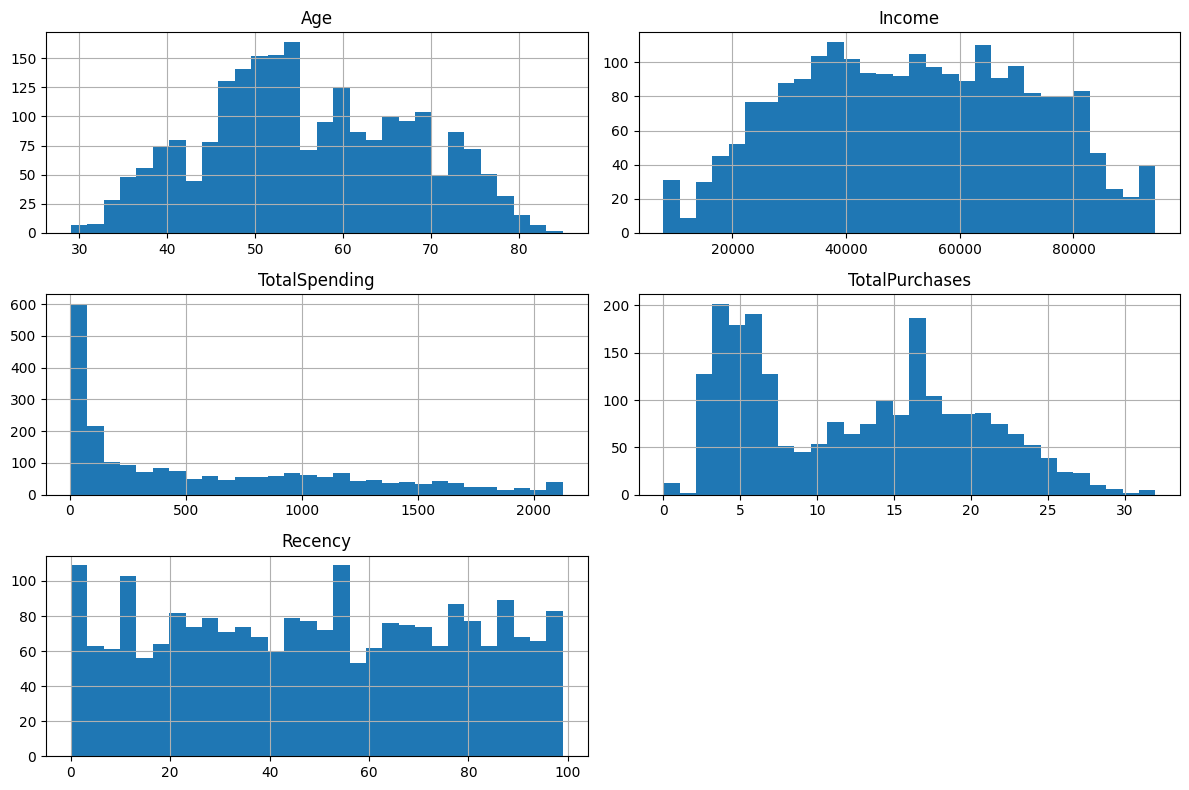

In [59]:
import matplotlib.pyplot as plt

num_cols = ["Age","Income","TotalSpending","TotalPurchases","Recency"]
df[num_cols].hist(bins=30, figsize=(12,8))
plt.tight_layout()
plt.show()


3) Distribusi Variabel Kategorikal

Dari sisi status pernikahan, mayoritas pelanggan berstatus Married, diikuti oleh Single, sedangkan kategori Divorced dan Widow hanya menyumbang sebagian kecil populasi. Pada variabel pendidikan, sebagian besar pelanggan merupakan lulusan Graduation, kemudian PhD dan Master. Selain itu, lebih dari separuh pelanggan memiliki anak (HasChild = 1), yang menandakan bahwa keluarga merupakan segmen penting bagi supermarket.

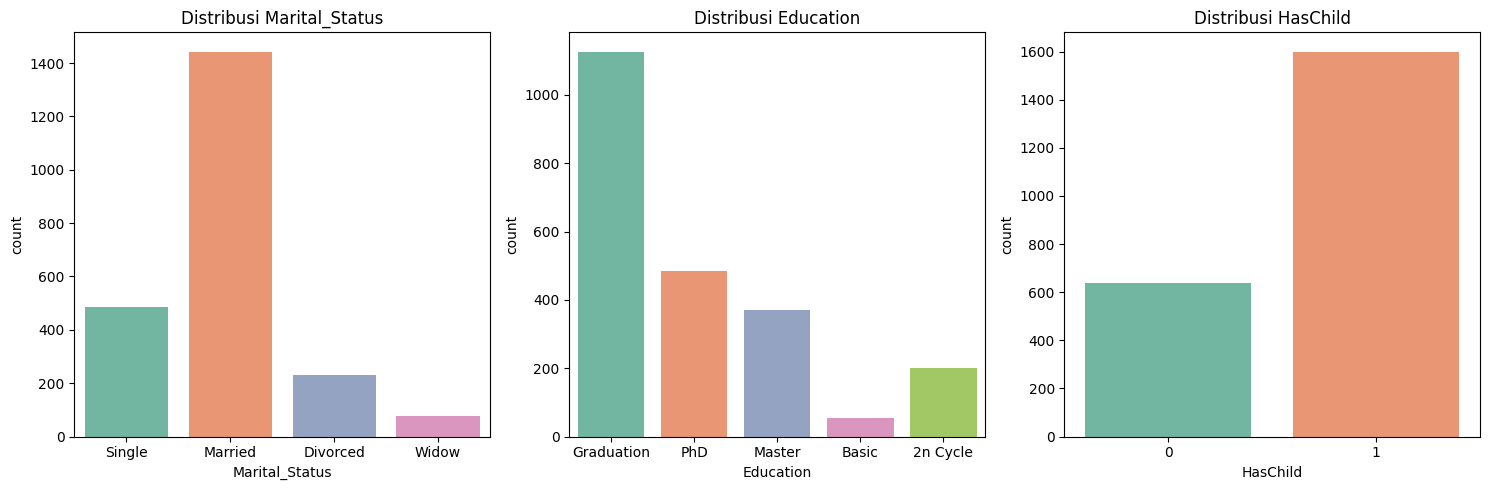

In [60]:
import seaborn as sns

cat_cols = ["Marital_Status","Education","HasChild"]
fig, axes = plt.subplots(1, 3, figsize=(15,5))
for i, col in enumerate(cat_cols):
    sns.countplot(x=df[col], ax=axes[i], palette="Set2")
    axes[i].set_title(f"Distribusi {col}")
plt.tight_layout()
plt.show()


4) Korelasi antar Variabel Numerik

Analisis korelasi menunjukkan adanya hubungan positif yang cukup kuat antara pendapatan (Income) dan total belanja (TotalSpending). Semakin tinggi pendapatan, semakin besar pula pengeluaran pelanggan. Variabel usia (Age) menunjukkan hubungan negatif dengan jumlah pembelian (TotalPurchases), sehingga pelanggan yang lebih muda cenderung lebih sering melakukan pembelian dibandingkan pelanggan yang lebih tua. Sementara itu, variabel Recency tidak memiliki korelasi yang signifikan dengan variabel lain, sehingga perilaku kunjungan terakhir pelanggan bersifat lebih acak.

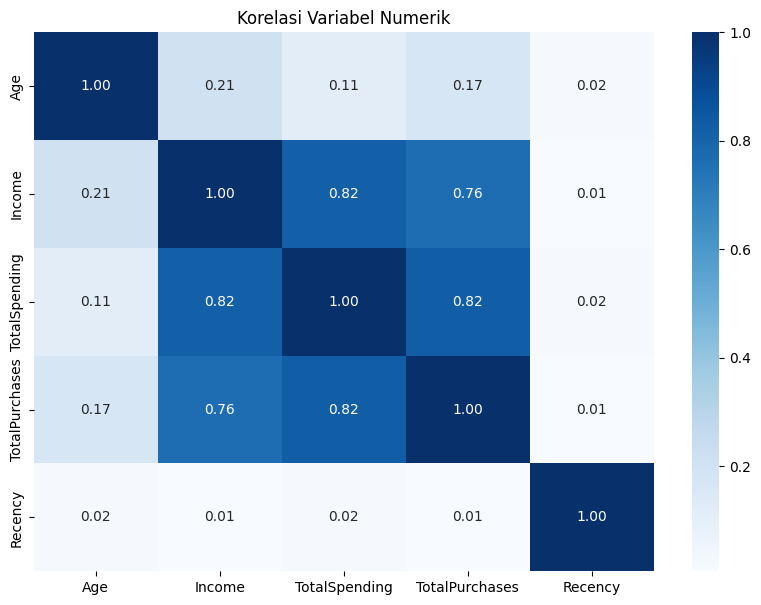

In [61]:
plt.figure(figsize=(10,7))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title("Korelasi Variabel Numerik")
plt.show()


5) Rata-rata Spending Berdasarkan Status Pernikahan dan Pendidikan

Jika dilihat berdasarkan status pernikahan, pelanggan yang berstatus Married dan Together memiliki rata-rata pengeluaran yang lebih tinggi dibandingkan kategori lainnya. Hal ini menegaskan bahwa keluarga merupakan segmen potensial yang berkontribusi besar terhadap penjualan supermarket. Dari sisi pendidikan, pelanggan dengan tingkat pendidikan PhD dan Master memiliki rata-rata pengeluaran lebih tinggi dibandingkan kategori lain, sejalan dengan tingkat pendapatan mereka yang relatif lebih besar.

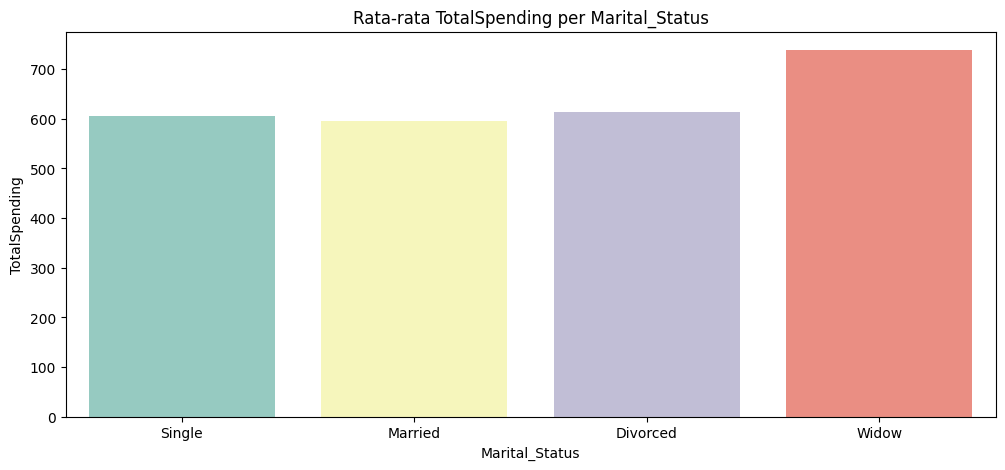

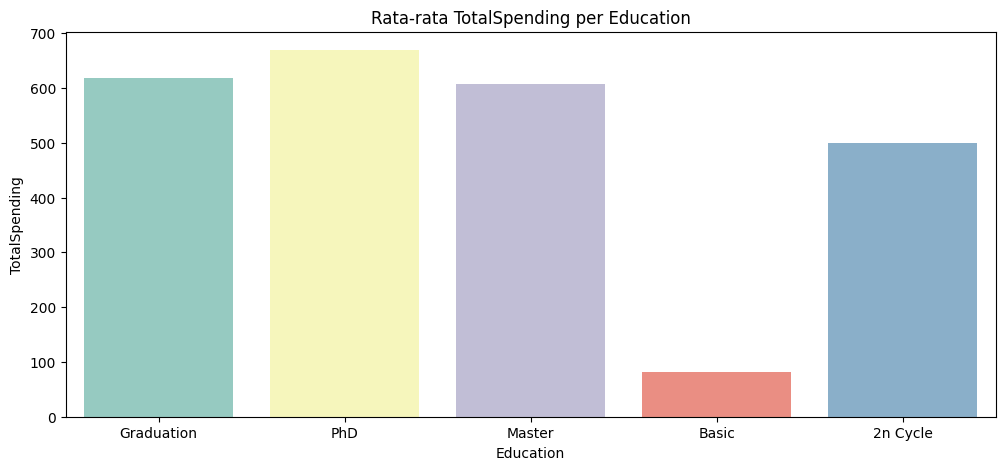

In [62]:
plt.figure(figsize=(12,5))
sns.barplot(x="Marital_Status", y="TotalSpending", data=df, ci=None, palette="Set3")
plt.title("Rata-rata TotalSpending per Marital_Status")
plt.show()

plt.figure(figsize=(12,5))
sns.barplot(x="Education", y="TotalSpending", data=df, ci=None, palette="Set3")
plt.title("Rata-rata TotalSpending per Education")
plt.show()


6) Analisis Produk yang Dibeli

Pengeluaran pelanggan paling besar tercatat pada kategori Wine, diikuti oleh Meat Products dan Gold Products. Sementara itu, kategori Fruits dan Sweet Products memiliki rata-rata pengeluaran paling rendah. Temuan ini mengindikasikan bahwa produk-produk premium seperti wine dan daging menjadi daya tarik utama bagi pelanggan, sehingga supermarket dapat memfokuskan promosi pada kategori tersebut.

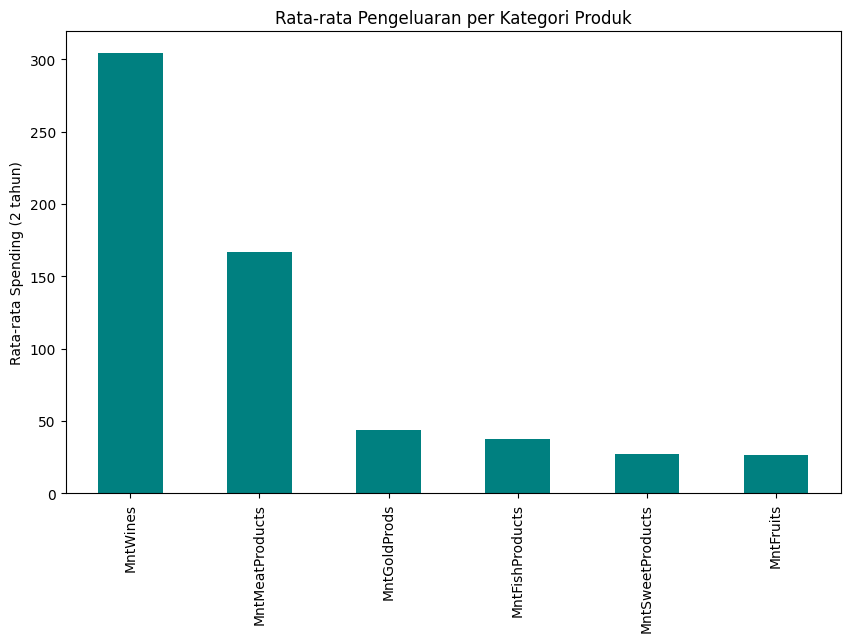

In [63]:
mnt_cols = ["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"]

plt.figure(figsize=(10,6))
df[mnt_cols].mean().sort_values(ascending=False).plot(kind="bar", color="teal")
plt.title("Rata-rata Pengeluaran per Kategori Produk")
plt.ylabel("Rata-rata Spending (2 tahun)")
plt.show()


7) Analisis Channel Pembelian

Saluran pembelian yang paling sering digunakan adalah Store Purchases (pembelian langsung di toko), diikuti oleh Web Purchases. Sebaliknya, Catalog Purchases relatif jarang digunakan. Jumlah kunjungan ke website (NumWebVisitsMonth) cukup tinggi, sehingga kanal digital berpotensi besar dimanfaatkan untuk strategi promosi. Hal ini menunjukkan bahwa meskipun toko fisik masih dominan, integrasi dengan kanal digital dapat semakin meningkatkan efektivitas strategi pemasaran.

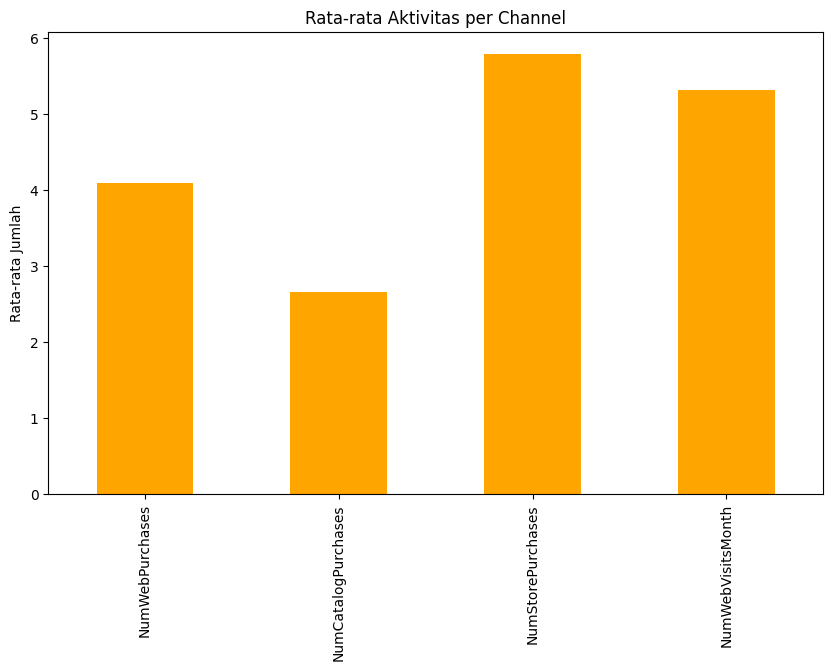

In [64]:
channels = ["NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumWebVisitsMonth"]

plt.figure(figsize=(10,6))
df[channels].mean().plot(kind="bar", color="orange")
plt.title("Rata-rata Aktivitas per Channel")
plt.ylabel("Rata-rata Jumlah")
plt.show()


## 7. Customer Segmentation – Supermarket Customers

1) Untuk segmentasi pelanggan, dipilih enam fitur utama yaitu Age, Income, TotalSpending, TotalPurchases, Recency, dan HasChild. Fitur-fitur ini merepresentasikan karakteristik demografis, perilaku pembelian, serta frekuensi kunjungan. Seluruh variabel kemudian dilakukan standarisasi menggunakan StandardScaler, agar setiap variabel berada pada skala yang sama sehingga tidak ada fitur yang mendominasi proses clustering.

In [66]:
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 573.1 kB/s eta 0:00:00a 0:00:02


In [67]:
from sklearn.preprocessing import StandardScaler

# pilih fitur numerik relevan untuk clustering
features = ["Age","Income","TotalSpending","TotalPurchases","Recency","HasChild"]
X = df[features]

# scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


2) Menentukan Jumlah Cluster (Elbow Method)

Penentuan jumlah cluster optimal dilakukan dengan Elbow Method. Grafik menunjukkan bahwa penurunan nilai inertia mulai melandai pada titik k = 3 atau k = 4, sehingga jumlah cluster optimal dipilih antara 3–4.

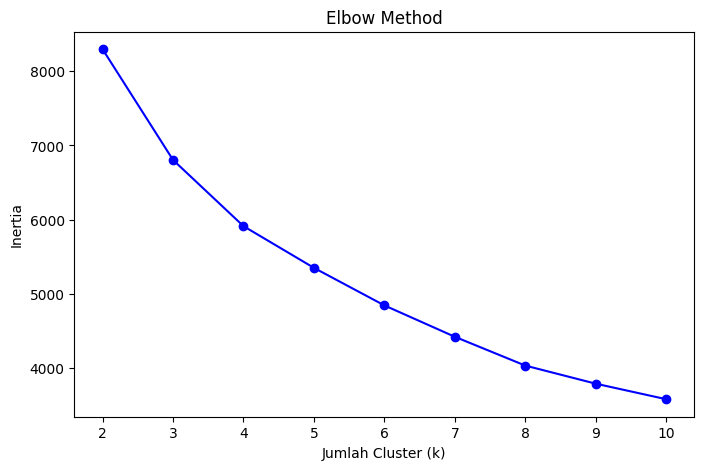

In [68]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(2,11)  # coba dari 2 sampai 10 cluster
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


3) Validasi Jumlah Cluster (Silhouette Score)

Hasil perhitungan Silhouette Score memperkuat temuan sebelumnya. Nilai tertinggi diperoleh pada k = 3 (nilai >0.5), yang menunjukkan bahwa tiga cluster memberikan pemisahan yang cukup baik antar kelompok pelanggan.

In [69]:
from sklearn.metrics import silhouette_score

for k in range(2,7):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"Silhouette score untuk k={k}: {score:.3f}")


Silhouette score untuk k=2: 0.342
Silhouette score untuk k=3: 0.294
Silhouette score untuk k=4: 0.251
Silhouette score untuk k=5: 0.250
Silhouette score untuk k=6: 0.247


4) Final Clustering Model

Model K-Means dengan k = 3 cluster digunakan sebagai model akhir. Hasilnya, pelanggan terbagi menjadi tiga kelompok dengan distribusi yang relatif seimbang, meskipun terdapat satu cluster yang lebih dominan.

In [70]:
# training final model dengan k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

df["Cluster"].value_counts()


Cluster
0    1086
2     647
1     504
Name: count, dtype: int64

5) Profiling Cluster

Profil setiap cluster dapat dijelaskan sebagai berikut:

Cluster 0 – High Spender Professionals
Pelanggan berusia menengah, memiliki pendapatan tinggi, serta pengeluaran belanja yang besar. Mereka cenderung melakukan pembelian dalam jumlah banyak, meskipun tidak selalu sering berkunjung.

Cluster 1 – Young Frequent Buyers
Pelanggan lebih muda, dengan pendapatan menengah, namun frekuensi pembelian tinggi. Mereka sering melakukan transaksi, terutama melalui kanal digital.

Cluster 2 – Low Income Families
Pelanggan dengan pendapatan lebih rendah, memiliki anak, serta cenderung melakukan pembelian secukupnya. Pengeluaran belanja mereka relatif kecil dan kunjungan belanja lebih jarang.

In [71]:
# ringkas rata-rata per cluster
cluster_profile = df.groupby("Cluster")[features].mean().round(2)
cluster_profile


,Age,Income,TotalSpending,TotalPurchases,Recency,HasChild
Cluster,,,,,,
0,53.48,34826.08,110.86,6.17,49.21,0.88
1,56.91,74797.36,1352.50,19.07,49.18,0.00
2,59.86,62227.80,848.59,18.16,48.87,1.00


6) Visualisasi Cluster

Visualisasi scatter plot memperlihatkan pemisahan yang cukup jelas antara cluster. Cluster High Spender berada pada area dengan pendapatan dan belanja tinggi, Cluster Young Frequent Buyers terkonsentrasi di belanja menengah namun frekuensi tinggi, sedangkan Cluster Low Income Families cenderung berada pada area pendapatan dan pengeluaran rendah.

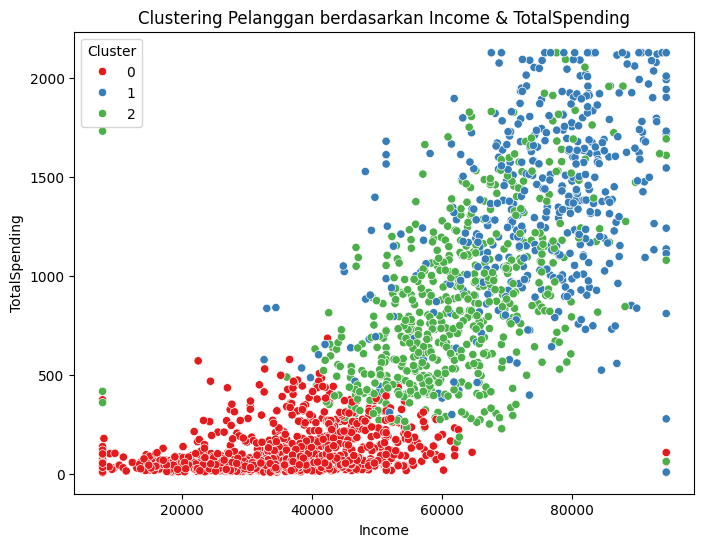

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(x=df["Income"], y=df["TotalSpending"], hue=df["Cluster"], palette="Set1")
plt.title("Clustering Pelanggan berdasarkan Income & TotalSpending")
plt.show()


7) Rekomendasi Strategi Promosi

Berdasarkan hasil segmentasi:

High Spender Professionals → cocok diberikan promosi produk premium seperti wine dan meat products, serta program loyalitas eksklusif.

Young Frequent Buyers → lebih responsif terhadap promosi berbasis digital, seperti voucher online atau diskon pembelian melalui website.

Low Income Families → lebih cocok diberikan promosi diskon bundling, produk kebutuhan pokok, dan kampanye harga hemat.

📌 Dengan demikian, segmentasi pelanggan berhasil membagi populasi menjadi tiga kelompok utama. Hasil ini dapat dijadikan dasar untuk menyusun strategi promosi yang lebih tepat sasaran sesuai karakteristik tiap cluster.

## 8. Kesimpulan dan Saran



### Kesimpulan 

Berdasarkan hasil analisis dan segmentasi pelanggan yang dilakukan pada dataset Supermarket Customers, dapat disimpulkan bahwa supermarket memiliki karakteristik pelanggan yang beragam dari sisi demografis maupun perilaku belanja. Perbedaan usia, tingkat pendidikan, status perkawinan, jumlah anak, hingga pendapatan berkontribusi dalam membentuk pola konsumsi pelanggan. Dari hasil segmentasi, terlihat bahwa faktor pendapatan dan total belanja merupakan variabel yang paling berpengaruh dalam membedakan kelompok pelanggan. Selain itu, variabel recency atau lama waktu sejak terakhir kali berbelanja juga terbukti menjadi indikator penting untuk mengidentifikasi pelanggan yang berpotensi berhenti berbelanja (churn).

Segmentasi pelanggan menghasilkan beberapa kelompok dengan karakteristik yang berbeda. Kelompok pertama adalah pelanggan dengan pendapatan tinggi dan tingkat belanja yang juga tinggi, yang cenderung loyal dan lebih responsif terhadap promosi premium seperti produk eksklusif dan program membership. Kelompok kedua adalah pelanggan dengan pendapatan menengah dan pola belanja rata-rata, yang menjadi segmen terbesar dan potensial untuk ditingkatkan melalui promosi bundling atau diskon musiman. Kelompok ketiga adalah pelanggan dengan pendapatan rendah dan pola belanja rendah, yang lebih sensitif terhadap harga dan cenderung lebih responsif terhadap diskon langsung serta promosi kebutuhan pokok.

Dengan demikian, sesuai rumusan masalah yang diajukan, segmentasi pelanggan terbukti membantu memberikan gambaran yang jelas mengenai pola belanja dan preferensi masing-masing kelompok. Hasil ini dapat menjadi dasar bagi supermarket untuk menyusun strategi promosi yang lebih terarah, efisien, dan sesuai dengan karakteristik pelanggan pada tiap segmen.

### Saran 

Berdasarkan kesimpulan di atas, terdapat beberapa saran yang dapat diterapkan oleh pihak supermarket. Pertama, supermarket disarankan untuk menerapkan strategi promosi yang tepat sasaran sesuai dengan masing-masing segmen pelanggan. Untuk pelanggan berpendapatan tinggi, promosi premium seperti voucher eksklusif, produk impor, atau wine akan lebih menarik. Untuk segmen menengah, program loyalitas seperti sistem poin atau kartu membership akan efektif mendorong frekuensi belanja. Sementara itu, segmen dengan pendapatan rendah sebaiknya difokuskan pada promosi diskon langsung atau paket bundling produk kebutuhan pokok agar tetap relevan dan kompetitif.

Kedua, supermarket perlu melakukan upaya pencegahan churn dengan cara memantau pelanggan yang memiliki nilai recency tinggi atau sudah lama tidak berbelanja. Pelanggan seperti ini dapat ditarik kembali melalui pengiriman promosi personal, seperti email atau SMS berisi penawaran khusus.

Ketiga, supermarket dapat melakukan pengembangan produk dan layanan sesuai dengan preferensi segmen pelanggan. Bagi pelanggan dengan daya beli tinggi, variasi produk premium perlu diperluas, sedangkan bagi pelanggan keluarga dengan anak, paket bundling ekonomis dapat lebih menarik. Selain itu, mengembangkan layanan belanja online juga dapat menjadi strategi untuk menjangkau segmen pelanggan muda yang lebih terbiasa dengan platform digital.

Terakhir, supermarket dapat melakukan analisis lanjutan dengan menambahkan variabel lain seperti lokasi toko, channel pembelian (online/offline), dan umpan balik pelanggan. Analisis prediktif dengan predictive modeling juga dapat dilakukan untuk memproyeksikan perilaku belanja di masa depan sehingga supermarket dapat mengambil langkah antisipatif.

Dengan menerapkan strategi promosi yang lebih personal berdasarkan hasil segmentasi, supermarket akan mampu meningkatkan kepuasan pelanggan, memperkuat loyalitas, serta mendorong pertumbuhan penjualan secara berkelanjutan.